# One class classification -Outlier Detection-
Author: Iraitz Azcarate

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from ipywidgets import interact

En este trabajo, haremos un breve analisis de deteccion de outliers sobre la base de datos 'Boston Housing', la cual me he descargado en formato csv.

Para comenzar, visualizamos sus columnas, y creo una tabla de datos reducida a dos dimensiones, con el objetivo de poder visualizar mejor los resultados de las diversas tecnicas que se aplicaran. 

In [2]:
df = pd.read_csv(r"C:\Users\irait\Desktop\MATE\KISA\Curso\KISA_Aprendizaje_Automatico_Avanzado\Entrega1\BostonHousing.csv")
df_red = df[["dis","rm"]]
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Estas son las descripciones de las variabes recogidas en nuestra base de datos:

**crim**: Tasa de criminalidad per cápita por ciudad.

**zn**: Proporción de terrenos residenciales asignados para lotes de más de 25,000 pies cuadrados.

**indus**: Proporción de acres comerciales no minoristas por ciudad.

**chas**: Variable binaria que indica si la propiedad está al lado del río Charles (1 si está cerca, 0 si no).

**nox**: Concentración de óxidos de nitrógeno (medido en partes por 10 millones, ppm), que indica el nivel de contaminación del aire.

**rm**: Número promedio de habitaciones por vivienda. Esta variable está relacionada con el tamaño y calidad de las propiedades.

**age**: Proporción de unidades ocupadas por propietarios construidas antes de 1940, lo cual puede reflejar la antigüedad y estado de la infraestructura.

**dis**: Distancias ponderadas a cinco centros de empleo de Boston, un indicador de la accesibilidad y ubicación de la propiedad.

**rad**: Índice de accesibilidad a carreteras radiales (una medida de conectividad a autopistas).

**tax**: Tasa de impuesto a la propiedad por cada 10,000 dólares de valor.

**ptratio**: Proporción de alumnos por maestro en cada distrito escolar, un indicador de la calidad educativa.

**black**: 1000(Bk - 0.63)^2, donde Bk es la proporción de personas de color por ciudad. Esta variable fue incluida como un indicador demográfico.

**lstat**: Porcentaje de la población con un estatus socioeconómico bajo.

**medv**: Valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares). Esta variable es la de respuesta en muchos análisis de este dataset.


Veamos como estan distribuidos los datos de las dos columnas seleccionadas: **dis** y **rm**.

In [3]:
fig = px.scatter(df_red, x="dis", y="rm", title="Gráfico de Dispersión")
fig.update_layout(
    title="",
    xaxis_title="Distancias a cinco centros de empleo",
    yaxis_title="Habitaciones por vivienda"
)
fig.show()

Por como estan distribuidos los puntos, parece una buena situación para aplicar tecnicas de deteccion de outliers

## Método 1: Local Outlier Factor (LOF) 

In [4]:
np.random.seed(42)
clf = LocalOutlierFactor(n_neighbors=5)
df_red = df[["dis","rm"]]

#Estandarizo los datos
scaler = StandardScaler()
df_red_scaled = scaler.fit_transform(df_red)
clf.fit_predict(df_red_scaled) 
outlierness = clf.negative_outlier_factor_
df_red["outlierness"] = abs(outlierness)

fig = px.scatter(df_red, x="dis", y="rm", title="Gráfico de Dispersión", color="outlierness")
fig.update_layout(
    title="Outlier Detection using the bidimensional data",
    xaxis_title="Distancias a cinco centros de empleo",
    yaxis_title="Habitaciones por vivienda"
)
fig.show()

C:\Users\irait\AppData\Local\Temp\ipykernel_30884\1999127416.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Como se muestra en el gráfico de arriba, el algoritmo de 'Local outlier factor' asigna un valor de outlierness a cada punto de la muestra. Esta asignación se da en función de la distancia euclidea entre los k puntos mas proximos, siendo finalmente el outlierness un valor proporcional a la densidad de la esfera que cubre los k vecinos más proximo de cada instancia. 

En este caso, hemos tomado k=5, obteniendo unos valores de outlierness que parecen razonables. Los puntos más oscuros son los que menos puntuacion de outlierness tienen, mientras que los más claros son los que más se acercan a ser identificados como outliers.

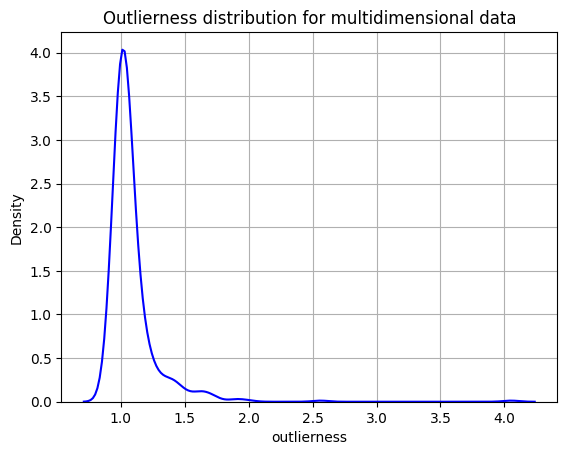

In [5]:
sns.kdeplot(df_red["outlierness"], color="blue", fill=False)

plt.title("Outlierness distribution for multidimensional data")
plt.xlabel("outlierness")
plt.ylabel("Density")
plt.grid()
plt.show()

Considerando los resultados anteriores, podriamos considerar 1.5 como el valor que delimita la designacion de una instancia como outlier o no. En ese caso, los puntos outliers serian los siguientes:

In [6]:
df_red["outlier"] = df_red["outlierness"]>1.5
fig = px.scatter(df_red, x="dis", y="rm", title="Gráfico de Dispersión", color="outlier")
fig.update_layout(
    title="Outlier Detection using the bidimensional data",
    xaxis_title="Distancias a cinco centros de empleo",
    yaxis_title="Habitaciones por vivienda"
)
fig.show()

C:\Users\irait\AppData\Local\Temp\ipykernel_30884\2714677011.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ahora, llevemos este mismo analisis a los datos en su totalidad. Aplicaremos el método LOF a los datos y a continuación, con el objetivo de visualizar los resultados, mostraremos una proyeccion de los datos realizada mediante PCA.

In [7]:
clf = LocalOutlierFactor(n_neighbors=5)
#Estandarizo los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
clf.fit_predict(df_scaled) 
outlierness = clf.negative_outlier_factor_
df["outlierness"] = abs(outlierness)


# 2. Aplicar PCA (aquí pedimos 2 componentes principales como ejemplo)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
print("Proporcion de varianza explicada por las primeras dos CP: ", np.sum(pca.explained_variance_ratio_))
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca["outlierness"] = df["outlierness"]


fig = px.scatter(df_pca, x="PC1", y="PC2", title="Gráfico de Dispersión", color="outlierness")
fig.update_layout(
    title="Outlier Detection using the multidimensional data",
    xaxis_title="PC1",
    yaxis_title="PC2"
)
fig.show()

Proporcion de varianza explicada por las primeras dos CP:  0.5853943917421118


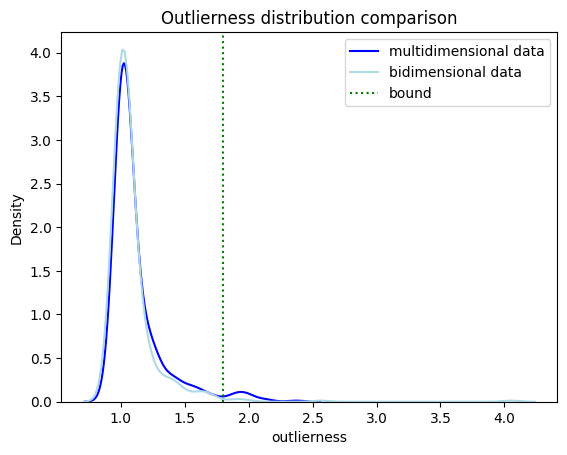

In [8]:
sns.kdeplot(df["outlierness"], color="blue", fill=False, label="multidimensional data")
sns.kdeplot(df_red["outlierness"], color="lightblue", fill=False, label="bidimensional data")
plt.axvline(x=1.8, color="green", linestyle=":", label=f"bound")
plt.title("Outlierness distribution comparison")
plt.xlabel("outlierness")
plt.ylabel("Density")
plt.legend()
plt.show()

In [9]:
df_pca["outlier"] = df_pca["outlierness"]>1.8
fig = px.scatter(df_pca, x="PC1", y="PC2", title="Gráfico de Dispersión", color="outlier")
fig.update_layout(
    title="Outlier Detection using the bidimensional data",
    xaxis_title="Distancias a cinco centros de empleo",
    yaxis_title="Habitaciones por vivienda"
)
fig.show()

Como vemos, el analisis de componenetes principales no nos muestra visualmente una buena representacion de los datos con solo dos componentes (58% varianza explicada). Aun asi, aunque visualmente no se muestre, los puntos marcados en rojo son los puntos más alejados del resto con lo que respecta a los datos en su dimension original, y por lo tanto, estos son los puntos Outliers que deberiamos considerar eliminar o al menos inspeccionar por separado antes de realizar cualquier analisis posterior.

## Método 2: One-class SVM

Para este segundo método, vamos a generar nosotros mismos la base de datos con el objetivo de visualizar de manera más clara los resultados, sin depender de reducciones de dimensionalidad.

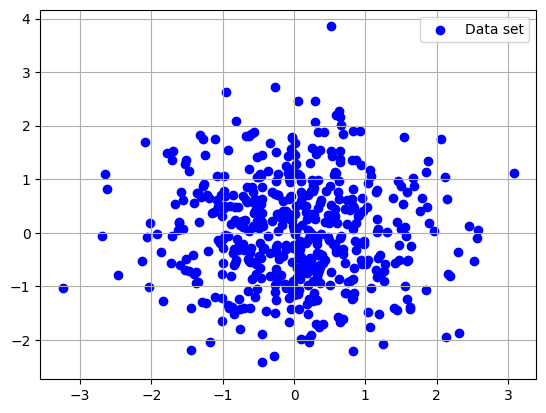

In [10]:
X = np.random.randn(500, 2) 


plt.scatter(X[:,0],X[:,1], label="Data set", color = 'blue')
plt.legend()
plt.grid()

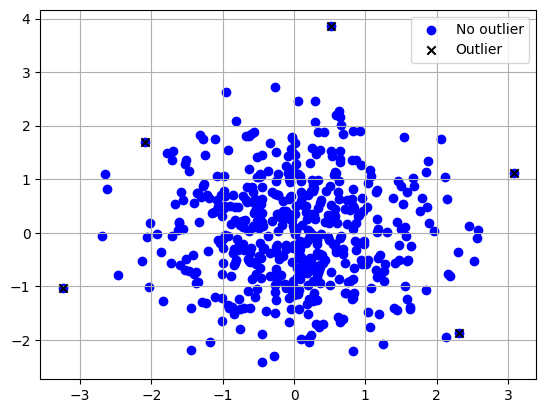

In [11]:

clf = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)  
clf.fit(X)


outlier_pred = clf.predict(X)  

plt.scatter(X[:,0],X[:,1], color = 'blue', label="No outlier")
a=0
for i in range(len(X)):
    if outlier_pred[i] == -1:  
        if a==0:
            plt.scatter(X[i, 0], X[i, 1], color= "black", marker='x', zorder=5, label="Outlier")
            a=1
        else:
            plt.scatter(X[i, 0], X[i, 1], color= "black", marker='x', zorder=5)
plt.legend()
plt.grid()
 


Este método aplica un 'Support vector machine' para separar linealmente la nube de puntos de nuestros datos con respecto al origen. Dependiendo de los parametros $\mu$ y $\gamma$ aplicados, el modelo será más o menos suave, y por lo tanto, las posibilidades de que un punto sea outlier varian dependiendo de estos parametros. Sin embargo, a diferencia de lo ocurrido con los datos de 'Boston Housing', se puede visualizar a la perfección como los puntos más aislados del conjunto de datos son precisamente los que se detectan como outliers. 

In [14]:


def update_plot( nu):
    clf = OneClassSVM(kernel='rbf', gamma=0.1, nu=nu)  
    clf.fit(X)  


    outlier_pred = clf.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], color='lightblue', label="No outlier")
    
    a = 0
    for i in range(len(X)):
        if outlier_pred[i] == -1:  
            if a == 0:
                plt.scatter(X[i, 0], X[i, 1], color="black", marker='x', zorder=5, label="Outlier")
                a = 1
            else:
                plt.scatter(X[i, 0], X[i, 1], color="black", marker='x', zorder=5)
    

    plt.legend()
    plt.grid()
    plt.title(f"OneClassSVM con nu={nu}")
    plt.show()

# Usar interact() para hacer los parámetros gamma y nu interactivos
interact(update_plot, nu=(0.01, 0.5, 0.01)) 

interactive(children=(FloatSlider(value=0.25, description='nu', max=0.5, min=0.01, step=0.01), Output()), _dom…

<function __main__.update_plot(nu)>